## **1. Реализация алгоритма**

In [ ]:
E = [(1, 2, 22), (1, 3, 23,), (1, 5, 27), 
     (2, 1, 22), (2, 4, 29), 
     (3, 1, 23), (3, 5, 18), (3, 6, 24), 
     (4, 2, 29), (4, 5, 15), (4, 8, 29), (4, 7, 20), 
     (5, 1, 27), (5, 3, 18), (5, 4, 15), (5, 7, 14), (5, 6, 19), 
     (6, 3, 24), (6, 5, 19), (6, 10, 26), 
     (7, 4, 20), (7, 5, 14), (7, 9, 31), (7, 8, 32), (7, 10, 30), 
     (8, 4, 29), (8, 7, 32), (8, 9, 28), 
     (9, 8, 28), (9, 7, 31), (9, 10, 27),
     (10, 7, 30), (10, 6, 26), (10, 9, 27)]

mst = []

In [ ]:
U, V = set(), set(v for v in range(1, 11))

elem = 3
U.add(elem)
V.remove(elem)

while V:
    temp = [] 
    for edge in E:
      if edge[0] in U and edge[1] in V:
          temp.append(edge)
    
    min_weighted_edge = min(temp, key=lambda x: x[2])
    u, v, *tail = min_weighted_edge
    
    mst.append(min_weighted_edge)
    E.remove(min_weighted_edge)

    for edge in E:
        if edge[0] == v and edge[1] == u:
            E.remove(edge)

    U.add(v)
    V.remove(v)

print(*mst, sep='\n')
print('Вес полученного графа:', sum([i[-1] for i in mst]))

(3, 5, 18)
(5, 7, 14)
(5, 4, 15)
(5, 6, 19)
(3, 1, 23)
(1, 2, 22)
(6, 10, 26)
(10, 9, 27)
(9, 8, 28)
Вес полученного графа: 192


## **2. Визуализация алгоритма**

In [ ]:
from matplotlib import rc
rc('animation', html='jshtml')

In [ ]:
import networkx as nx

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import time

In [ ]:
# для визуализации
E = [(1, 2, 22), (1, 3, 23,), (1, 5, 27), (2, 4, 29), (3, 5, 18), (3, 6, 24), 
     (4, 5, 15), (4, 8, 29), (4, 7, 20), (5, 7, 14), (5, 6, 19), (6, 10, 26), 
     (7, 9, 31), (7, 8, 32), (7, 10, 30), (8, 9, 28), (9, 10, 27)]

In [ ]:
mst

[(3, 5, 18),
 (5, 7, 14),
 (5, 4, 15),
 (5, 6, 19),
 (3, 1, 23),
 (1, 2, 22),
 (6, 10, 26),
 (10, 9, 27),
 (9, 8, 28)]

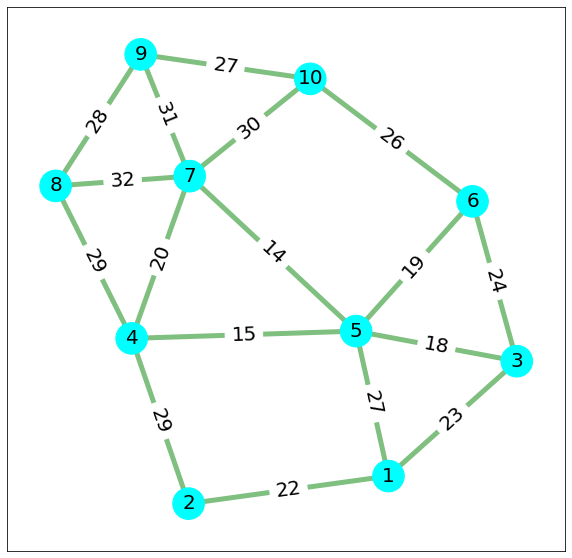

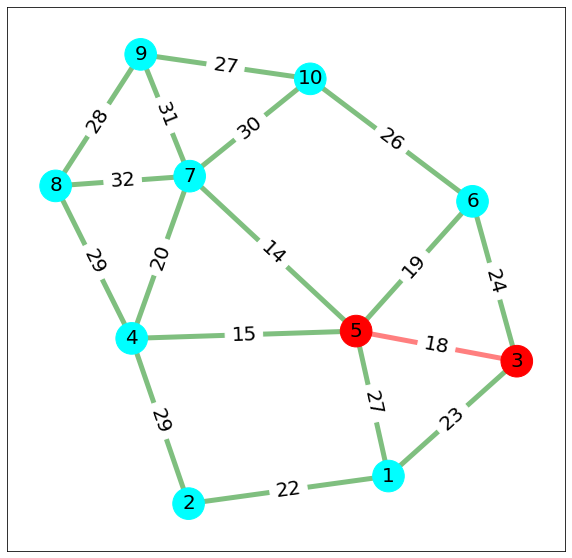

In [ ]:
# визуализация алгоритма
fig, ax = plt.subplots(figsize=(10, 10))

# весь граф
G = nx.Graph()

for u, v, w in E:
    G.add_edge(u, v, weight=w)

pos = nx.spring_layout(G, seed=10)  # seed for reproducibility

all_nodes = [i for i in G.nodes()]
nodes_color_map = ['cyan' for _ in all_nodes]

all_edges = [(u, v) for (u, v, d) in G.edges(data=True)]
edges_color_map = ['green' for _ in all_edges]


nx.draw_networkx_nodes(G, pos, node_size=1000, node_color=nodes_color_map)
nx.draw_networkx_edges(G, pos, width=5, alpha=0.5, edge_color=edges_color_map)

nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=20)

# то, что анимируем
def animate(i):
    """Закрашивает граф в соответствии с алгоритмом Прима."""
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.clear()
    u, v, w = mst[i]
    nodes_color_map[all_nodes.index(u)] = 'red'
    nodes_color_map[all_nodes.index(v)] = 'red'
    if (u, v) in all_edges:
        edges_color_map[all_edges.index((u, v))] = 'red'
    else:
        edges_color_map[all_edges.index((v, u))] = 'red'
    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color=nodes_color_map)
    nx.draw_networkx_edges(G, pos, width=5, alpha=0.5, edge_color=edges_color_map)

    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=20)

    time.sleep(0.5)

# запуск
ani = FuncAnimation(fig, animate, frames=len(mst), interval=500, repeat=False)

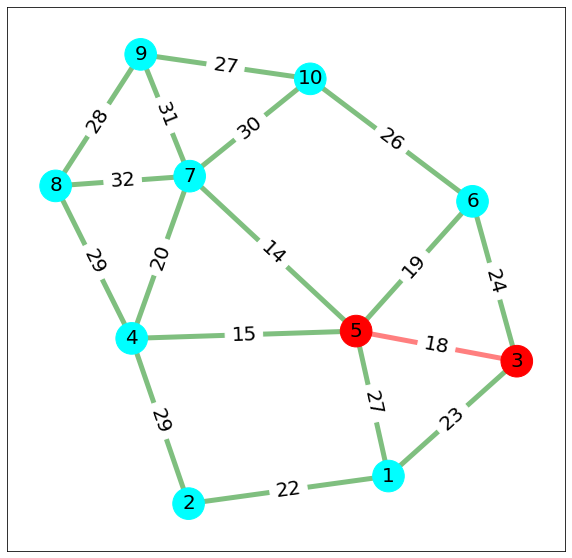

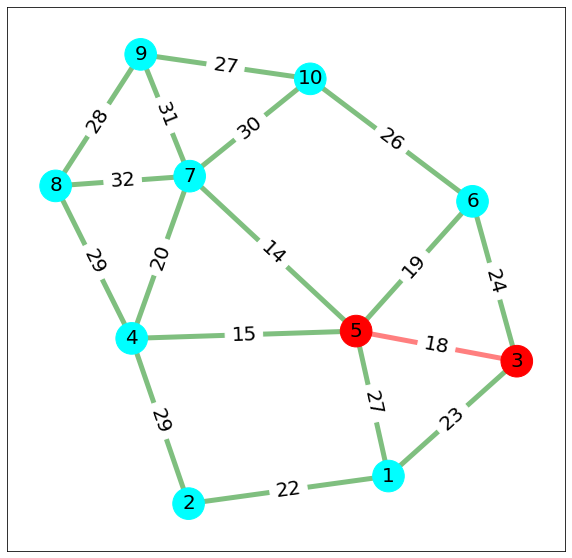

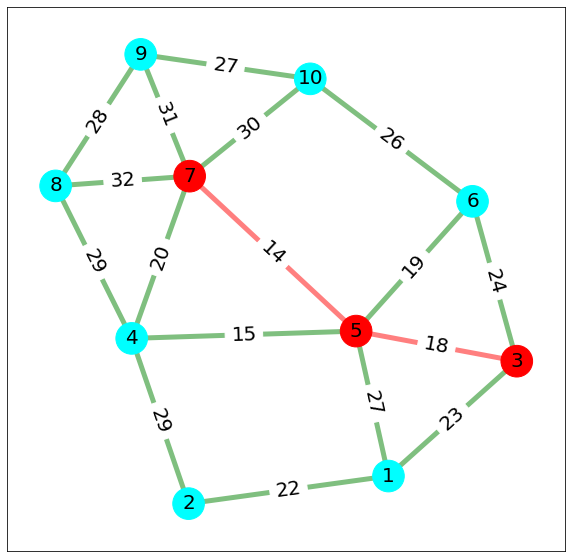

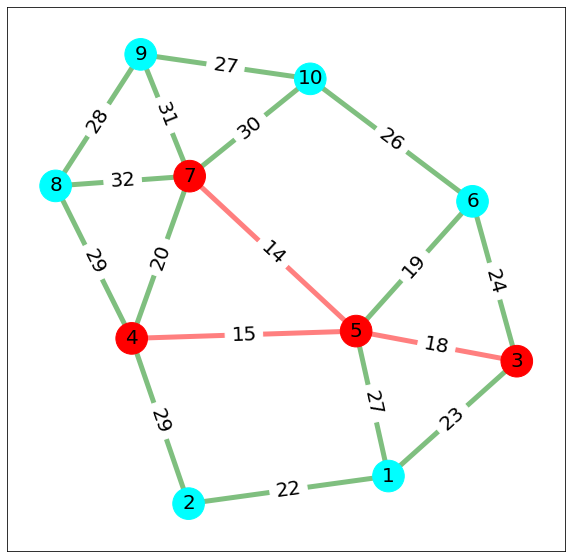

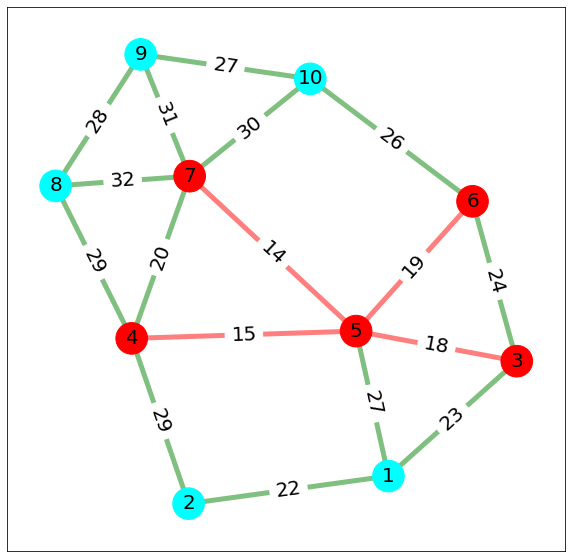

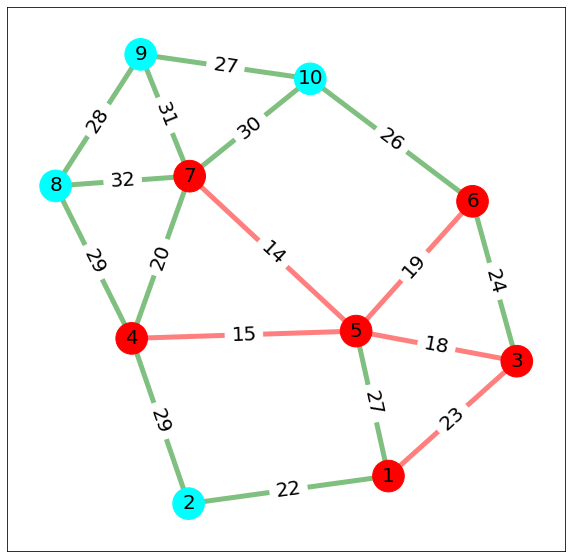

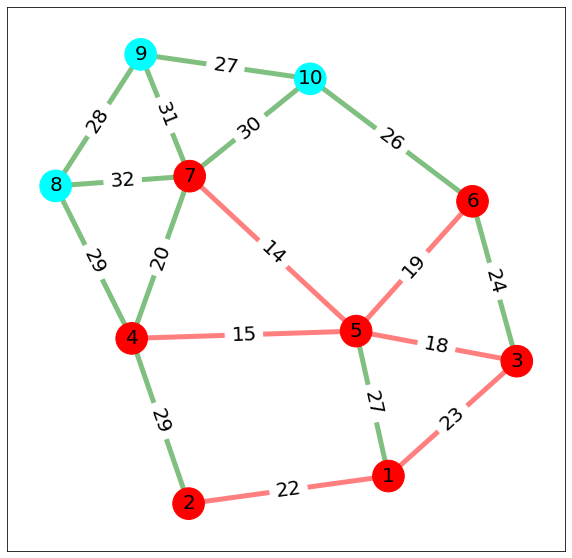

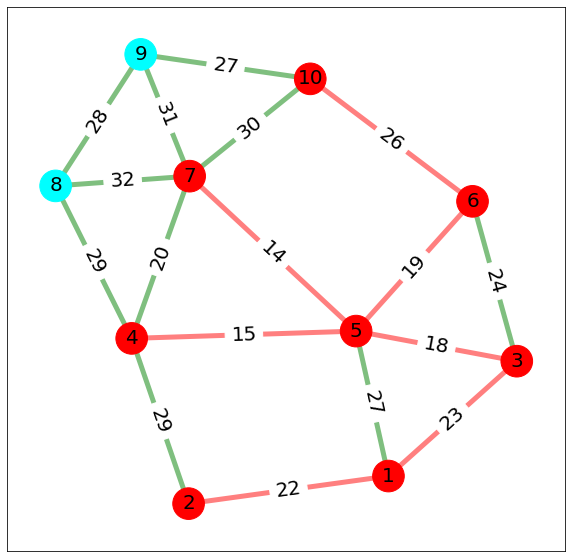

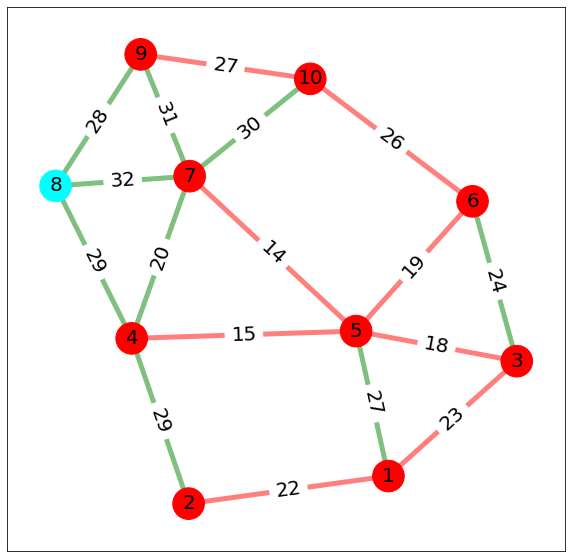

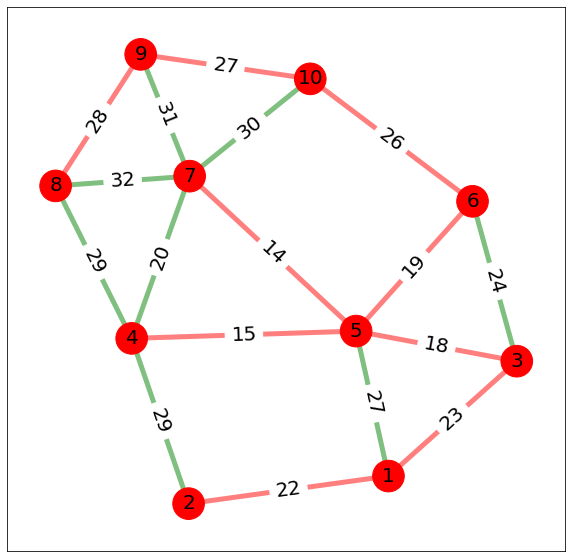

In [ ]:
ani